In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('naukri.csv')

In [3]:
data.shape

(22000, 14)

In [4]:
data.head()

company  ...                           uniq_id
0                            MM Media Pvt Ltd  ...  43b19632647068535437c774b6ca6cf8
1                          find live infotech  ...  d4c72325e57f89f364812b5ed5a795f0
2         Softtech Career Infosystem Pvt. Ltd  ...  c47df6f4cfdf5b46f1fd713ba61b9eba
3                      Onboard HRServices LLP  ...  115d28f140f694dd1cc61c53d03c66ae
4  Spire Technologies and Solutions Pvt. Ltd.  ...  a12553fc03bc7bcced8b1bb8963f97b4

[5 rows x 14 columns]

Job Location, Address, Education, Industry and Skills must be cleansed carefully

Cleaning joblocation_address

In [5]:
data['joblocation_address'] = data['joblocation_address'].str.split(',')
data['joblocation_address']

0                                                [Chennai]
1                                                [Chennai]
2                                              [Bengaluru]
3        [Mumbai,  Bengaluru,  Kolkata,  Chennai,  Coim...
4                                              [Bengaluru]
                               ...                        
21995                                          [Bengaluru]
21996                                [Bengaluru,  Gurgaon]
21997                                          [Bengaluru]
21998                              [Delhi NCR,  Bengaluru]
21999                                          [Bengaluru]
Name: joblocation_address, Length: 22000, dtype: object

In [6]:
 data = data.explode('joblocation_address')
 
 pd.set_option('max_rows',50000)
 data['joblocation_address'].value_counts()

Bengaluru/Bangalore                               3775
Mumbai                                            2593
Bengaluru/Bangalore                               2134
Bengaluru                                         2026
 Mumbai                                           1378
Chennai                                           1290
Hyderabad / Secunderabad                          1246
Hyderabad                                         1154
Mumbai                                            1067
 Mumbai                                            923
 Chennai                                           905
Delhi                                              790
Noida                                              777
Gurgaon                                            762
 Chennai                                           738
 Hyderabad / Secunderabad                          700
Delhi                                              680
 Pune                                              645
 Delhi    

In [7]:
#if data['joblocation_address'].str.startswith('\s'):
  #data['joblocation_address'] = data['joblocation_address'].str[1:]

In [8]:

data['joblocation_address'] = data['joblocation_address'].replace(('(Bengaluru/Bangalore)',' Bangalore',
                                                                ' Bangalore ','Bangalore ','Bengaluru/Bangalore ',
                                                                 ' Bengaluru/Bangalore ',' Bengaluru/Bangalore',
                                                                'Bengaluru/Bangalore','Bengaluru','NCR Bangalore',
                                                                'NCR Bangalore ','Near Bangalore', ' Bengaluru/Bangalore',
                                                                 ' Bengaluru/Bangalore ', ' Bengaluru',
                                                                 'Bangalore , Bangalore / Bangalore',
                                                                 'Bangalore , karnataka',' Bengaluru / Bangalore', 
                                                                 ' Bengaluru / Bangalore ', 'Bengaluru Bangalore',
                                                                 'India-Karnataka-Bangalore',' bangalore',' karnataka',
                                                                ' Bengaluru Bangalore'),
                                                                ('Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                 'Bangalore','Bangalore', 'Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore',))
                                                                
data['joblocation_address'] = data['joblocation_address'].replace(('Hyderabad / Secunderabad',' Hyderabad / Secunderabad',
                                                                 ' Hyderabad / Secunderabad ','Hyderabad / Secunderabad ',
                                                                ' Hyderabad','Hyderabad ',' Hyderabad ',
                                                                 'Hyderabad/Secunderabad','Hyderabad/Secunderabad ',
                                                                ' Hyderabad/Secunderabad ',' Hyderabad/Secunderabad',),
                                                                ('Hyderabad', 'Hyderabad','Hyderabad','Hyderabad',
                                                                 'Hyderabad', 'Hyderabad','Hyderabad','Hyderabad',
                                                                'Hyderabad','Hyderabad','Hyderabad'))


  
data['joblocation_address'] = data['joblocation_address'].replace(('NAVI MUMBAI',' NAVI MUMBAI','NAVI MUMBAI ',
                                                                 ' NAVI MUMBAI',' NAVI MUMBAI ','Mumbai , Mumbai',
                                                                 ' Mumbai',' Mumbai ','Mumbai ','mumbai','Navi Mumbai',
                                                                ' Navi Mumbai',' Navi Mumbai ','Navi Mumbai ', 
                                                                 ' Mumbai Suburbs','Mumbai Suburbs ','Mumbai Suburbs',
                                                                ' Mumbai Suburbs ','mumbai',' mumbai','mumbai ',
                                                                 ' maharashtra'),
                                                                ('Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai',
                                                                 'Mumbai','Mumbai','Mumbai', 'Mumbai','Mumbai','Mumbai',
                                                                'Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai',
                                                                'Mumbai','Mumbai', 'Mumbai'))

data['joblocation_address'] = data['joblocation_address'].replace(('Noida','Noida ',' Noida',' Delhi','Delhi','Delhi ',' Delhi ',
                                                                 'Gurgaon',' Gurgaon',' Gurgaon ','Gurgaon ', ' noida',
                                                                 ' Noida/Greater Noida',' Noida ', ' Delhi NCR',
                                                                 'Delhi/NCR(National Capital Region)',' Delhi/NCR ',
                                                                 ' Delhi/NCR(National Capital Region)',
                                                                 ' Delhi/NCR(National Capital Region) ',
                                                                 'Delhi/NCR(National Capital Region) ','Delhi , Delhi',
                                                                 'Noida , Noida/Greater Noida','Ghaziabad',
                                                                 'Delhi/NCR(National Capital Region) , Gurgaon',
                                                                 'NCR , NCR','NCR/NCR(National Capital Region)',
                                                                'NCR , NCR/Greater NCR','NCR/NCR(National Capital Region), NCR',
                                                                 'NCR , NCR/NCR(National Capital Region)',
                                                                 'NCR/NCR(National Capital Region)','NCR/Greater NCR',
                                                                 'NCR/NCR(National Capital Region) , NCR','Delhi/NCR ',
                                                                ' Noida/Greater Noida','Greater Noida',' Greater Noida',
                                                                 ' Greater Noida ','Greater Noida ','Ghaziabad',' Ghaziabad',
                                                                 'Ghaziabad ',' Ghaziabad ','Faridabad','Faridabad ',
                                                                 ' Faridabad',' Faridabad ',' Noida/Greater Noida',
                                                                 ' Noida/Greater Noida ',' delhi',' Delhi/NCR','Delhi NCR'
                                                                ),
                                                                ('NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR','NCR','NCR','NCR','NCR','NCR', 'NCR','NCR','NCR','NCR',
                                                                 'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                 'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR'))


data['joblocation_address'] = data['joblocation_address'].replace(('Chennai ',' Chennai',' Chennai ',' Chennai',
                                                                 'chennai ',' chennai',' chennai ',' chennai',),
                                                                ('Chennai', 'Chennai','Chennai','Chennai','Chennai',
                                                                'Chennai','Chennai','Chennai',))

data['joblocation_address'] = data['joblocation_address'].replace(('Pune ',' Pune',' Pune '),('Pune','Pune','Pune'))
data['joblocation_address'] = data['joblocation_address'].replace(('Kolkata ',' Kolkata',' Kolkata ',
                                                                ' kolkata','kolkata ',' kolkata'),
                                                                ('Kolkata','Kolkata','Kolkata',
                                                                  'Kolkata','Kolkata','Kolkata'))
data['joblocation_address'] = data['joblocation_address'].replace((' Ahmedabad','Ahmedabad ',' Ahmedabad '),('Ahmedabad',
                                                                                         'Ahmedabad','Ahmedabad'))
data['joblocation_address'] = data['joblocation_address'].replace(('Chandigarh ',' Chandigarh',' Chandigarh '),
                                                                ('Chandigarh','Chandigarh','Chandigarh'))
data['joblocation_address'] = data['joblocation_address'].replace(('Surat ',' Surat',' Surat '),
                                                                ('Surat','Surat','Surat'))
data['joblocation_address'] = data['joblocation_address'].replace(('Ernakulam / Kochi/ Cochin ', ' Kochi', 'Kochi ',' Kochi ',
                                                                 ' Cochin/ Kochi/ Ernakulam', ' Cochin/ Kochi/ Ernakulam ', 
                                                                 ' Ernakulam / Kochi/ Cochin',' Ernakulam / Kochi/ Cochin '),
                                                                ('Kochi','Kochi','Kochi','Kochi','Kochi','Kochi','Kochi',
                                                                 'Kochi',))
data['joblocation_address'] = data['joblocation_address'].replace(('Coimbatore ',' Coimbatore',' Coimbatore '),
                                                                ('Coimbatore','Coimbatore','Coimbatore'))
data['joblocation_address'] = data['joblocation_address'].replace(('Coimbatore ',' Coimbatore',' Coimbatore '),
                                                                ('Coimbatore','Coimbatore','Coimbatore'))
data['joblocation_address'] = data['joblocation_address'].replace(('Lucknow ',' Lucknow',' Lucknow '),
                                                                ('Lucknow','Lucknow','Lucknow'))
data['joblocation_address'] = data['joblocation_address'].replace(('Jaipur ',' Jaipur',' Jaipur ','jaipur ',' jaipur',
                                                                 ' jaipur '),
                                                                ('Jaipur','Jaipur','Jaipur','Jaipur','Jaipur','Jaipur'))
data['joblocation_address'] = data['joblocation_address'].replace(('Vijayawada ',' Vijayawada',' Vijayawada '),
                                                                ('Vijayawada','Vijayawada','Vijayawada'))
data['joblocation_address'] = data['joblocation_address'].replace(('Visakhapatnam ',' Visakhapatnam',' Visakhapatnam ',
                                                                'Visakhapatnam/Vizag ',' Visakhapatnam/Vizag',
                                                                 ' Visakhapatnam/Vizag '),
                                                                ('Visakhapatnam','Visakhapatnam','Visakhapatnam',
                                                                 'Visakhapatnam','Visakhapatnam','Visakhapatnam',
                                                                ))

data['joblocation_address'] = data['joblocation_address'].replace((' Bhubaneshwar',' Bhubaneshwar',' Bhubaneshwar '),
                                                                ('Bhubaneshwar','Bhubaneshwar','Bhubaneshwar'))
data['joblocation_address'] = data['joblocation_address'].replace((' Patna',' Patna',' Patna '),
                                                                ('Patna','Patna','Patna'))

data['joblocation_address'] = data['joblocation_address'].replace((' Trivandrum',' Trivandrum',' Trivandrum '),
                                                                ('Trivandrum','Trivandrum','Trivandrum'))

data['joblocation_address'] = data['joblocation_address'].replace((' Mangalore',' Mangalore',' Mangalore '),
                                                                ('Mangalore','Mangalore','Mangalore'))
data['joblocation_address'] = data['joblocation_address'].replace((' Indore',' Indore',' Indore '),
                                                                ('Indore','Indore','Indore'))
data['joblocation_address'] = data['joblocation_address'].replace((' Guwahati',' Guwahati',' Guwahati '),
                                                                ('Guwahati','Guwahati','Guwahati'))
data['joblocation_address'] = data['joblocation_address'].replace((' Nagpur',' Nagpur',' Nagpur '),
                                                                ('Nagpur','Nagpur','Nagpur'))
data['joblocation_address'] = data['joblocation_address'].replace((' Raipur',' Raipur',' Raipur '),
                                                                ('Raipur','Raipur','Raipur'))
data['joblocation_address'] = data['joblocation_address'].replace((' Thane',' Thane',' Thane '),
                                                                ('Thane','Thane','Thane'))
data['joblocation_address'] = data['joblocation_address'].replace((' Bhopal',' Bhopal',' Bhopal '),
                                                                ('Bhopal','Bhopal','Bhopal'))
data['joblocation_address'] = data['joblocation_address'].replace((' Vadodara/Baroda',' Vadodara/Baroda',' Vadodara/Baroda ',
                                                                ' Vadodara','Vadodara ',' Vadodara '),
                                                                ('Vadodara','Vadodara','Vadodara','Vadodara',
                                                                 'Vadodara','Vadodara',))
                                                                                                                                  
pd.set_option('max_rows', 50000)
data['joblocation_address'].value_counts()

Bangalore                                         9963
NCR                                               8668
Mumbai                                            6403
Hyderabad                                         4570
Chennai                                           3373
Pune                                              1227
Kolkata                                            543
Ahmedabad                                          404
Chandigarh                                         189
Kochi                                              140
Coimbatore                                         136
Jaipur                                             131
Visakhapatnam                                      125
Surat                                              106
Lucknow                                            101
Vijayawada                                          84
Bhubaneshwar                                        74
Trivandrum                                          69
Vadodara  

In [9]:
counts = data['joblocation_address'].value_counts()
data = data[data['joblocation_address'].isin(counts.index[counts>25])]

In [10]:
data['joblocation_address'].value_counts()

Bangalore        9963
NCR              8668
Mumbai           6403
Hyderabad        4570
Chennai          3373
Pune             1227
Kolkata           543
Ahmedabad         404
Chandigarh        189
Kochi             140
Coimbatore        136
Jaipur            131
Visakhapatnam     125
Surat             106
Lucknow           101
Vijayawada         84
Bhubaneshwar       74
Trivandrum         69
Vadodara           65
Indore             63
Mangalore          57
Thane              48
Nagpur             45
Bhopal             42
Guwahati           39
Raipur             32
Patna              26
Name: joblocation_address, dtype: int64

Cleaning experience

In [11]:
data['experience']

0            0 - 1 yrs
1            0 - 0 yrs
2            4 - 8 yrs
3          11 - 15 yrs
3          11 - 15 yrs
3          11 - 15 yrs
3          11 - 15 yrs
3          11 - 15 yrs
4            6 - 8 yrs
5            2 - 5 yrs
6            1 - 3 yrs
6            1 - 3 yrs
6            1 - 3 yrs
6            1 - 3 yrs
6            1 - 3 yrs
6            1 - 3 yrs
6            1 - 3 yrs
6            1 - 3 yrs
7            2 - 7 yrs
8            1 - 3 yrs
9            1 - 5 yrs
10           1 - 3 yrs
10           1 - 3 yrs
10           1 - 3 yrs
11           4 - 8 yrs
12           2 - 4 yrs
13           3 - 8 yrs
14           1 - 5 yrs
15           5 - 7 yrs
16           1 - 2 yrs
17           2 - 4 yrs
18          5 - 10 yrs
19           0 - 1 yrs
20           1 - 5 yrs
21          5 - 10 yrs
22           3 - 8 yrs
23          6 - 10 yrs
24         10 - 12 yrs
25           4 - 6 yrs
26           1 - 6 yrs
26           1 - 6 yrs
27           0 - 1 yrs
28           3 - 6 yrs
29         

In [12]:
#Split this into minimum and maximum 
data['experience'] = data['experience'].str.split(" ")
data['Min Experience'] = data['experience'].apply(lambda x: x[0])
data['Max Experience'] = data['experience'].apply(lambda x: x[2] if len(x) > 2 else x[1])

In [13]:
data['Min Experience'].value_counts()

2      7301
0      6340
3      5343
1      4490
5      3329
4      3135
6      1530
10     1430
8      1292
7      1048
9       486
12      315
15      285
Not     111
11       75
13       74
14       63
20       26
18       25
16       16
17        6
25        1
26        1
23        1
Name: Min Experience, dtype: int64

In [14]:
data['Max Experience'].value_counts()

5            6458
7            4494
8            3740
6            3303
3            3233
10           2860
4            2664
9            1815
2            1597
12           1085
1            1064
11           1059
15            834
13            682
20            501
0             358
14            251
18            134
Mentioned     111
16            109
17             94
25             85
22             85
19             27
23             26
24             20
21             12
30             11
28              8
27              1
-1              1
26              1
Name: Max Experience, dtype: int64

In [15]:
data['Min Experience'] = data['Min Experience'].replace('Not',0)
data['Max Experience'] = data['Max Experience'].replace(('Mentioned','-1'),(5,5))

In [16]:
data['Min Experience'] = data['Min Experience'].astype('int')
data['Max Experience'] = data['Max Experience'].astype('int')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


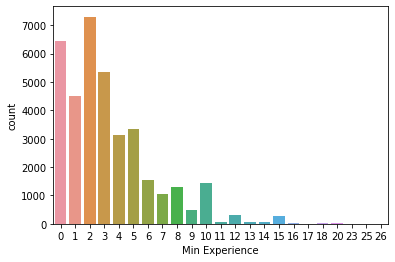

In [17]:
sb.countplot(data['Min Experience'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


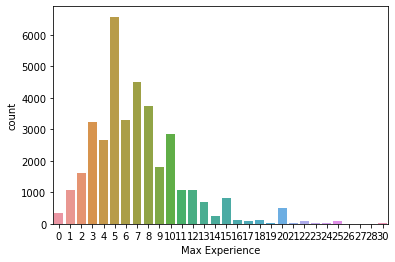

In [18]:
sb.countplot(data['Max Experience'])

Cleaning Education

In [19]:
data['education']

0        UG: B.Tech/B.E. - Any Specialization PG:Any Po...
1        UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...
2        UG: Any Graduate - Any Specialization PG:Any P...
3        UG: Any Graduate - Any Specialization PG:CA Do...
3        UG: Any Graduate - Any Specialization PG:CA Do...
3        UG: Any Graduate - Any Specialization PG:CA Do...
3        UG: Any Graduate - Any Specialization PG:CA Do...
3        UG: Any Graduate - Any Specialization PG:CA Do...
4        UG: B.Tech/B.E. - Any Specialization PG:Any Po...
5        UG: B.Tech/B.E. - Any Specialization PG:MCA - ...
6                                                      NaN
6                                                      NaN
6                                                      NaN
6                                                      NaN
6                                                      NaN
6                                                      NaN
6                                                      N

In [20]:
data['education'].mode()

0    UG: Any Graduate - Any Specialization, Graduat...
dtype: object

In [21]:
data['education'].isnull().sum()

3132

In [22]:
data['education'] = data['education'].fillna(data['education'].mode()[0])

In [23]:
data['education'].isnull().sum()

0

In [24]:
data['education'] = data['education'].str.split(' ')                            
data['education'] = data['education'].apply(lambda x: x[1] if len(x)>1 else x[0])
data['education'].value_counts()

Any                    24216
B.Tech/B.E.             8835
B.Com                    647
B.Sc                     544
Diploma                  441
Graduation               397
B.B.A                    267
B.A                      240
BCA                      174
MBBS                     155
BDS                      109
B.Pharma                  97
Other                     86
B.Ed                      85
LLB                       71
BHM                       54
-                         54
Not                       54
Doctorate                 49
B.Arch                    37
B.Tech/B.E.,              23
B.Sc,                     21
Postgraduate              14
PG:CA                     10
Doctorate:Doctorate        9
B.Pharma,                  7
B.Com,                     5
Diploma,                   5
BCA,                       3
BVSC                       3
B.A,                       3
B.B.A,                     2
MBA/PGDM                   2
B.Des.                     1
PG:Other      

In [25]:
data['education'] = data['education'].replace(('B.Tech/B.E.','Graduation','Other','-','Not','B.Tech/B.E.,','Postgraduate',
                                               'PG:CA','Diploma,','B.Com,','B.Pharma,','B.A,','BCA,','B.Sc,','MBA/PGDM','B.B.A,',
                                              'PG:Other','Doctorate:Doctorate','Post'),
                                              ('B.Tech','B.Tech','B.Tech','B.Tech','B.Tech','B.Tech','B.Tech',
                                              'CA','Diploma','B.Com','B.Pharma','B.A','BCA','B.Sc','MBA','BBA',
                                              'B.Tech','Doctorate','B.Tech'))

data['education'].value_counts()

Any          24216
B.Tech        9464
B.Com          652
B.Sc           565
Diploma        446
B.B.A          267
B.A            243
BCA            177
MBBS           155
BDS            109
B.Pharma       104
B.Ed            85
LLB             71
Doctorate       58
BHM             54
B.Arch          37
CA              10
BVSC             3
MBA              2
BBA              2
BAMS             1
BFA              1
B.Des.           1
Name: education, dtype: int64

Cleaning Industry

In [26]:
data['industry'].value_counts()

IT-Software / Software Services                               14695
BPO / Call Centre / ITES                                       2321
Banking / Financial Services / Broking                         2113
Education / Teaching / Training                                1727
Recruitment / Staffing                                         1538
Automobile / Auto Anciliary / Auto Components                  1171
Internet / Ecommerce                                           1025
Pharma / Biotech / Clinical Research                           1023
Construction / Engineering / Cement / Metals                    953
Medical / Healthcare / Hospitals                                874
Travel / Hotels / Restaurants / Airlines / Railways             733
Industrial Products / Heavy Machinery                           608
Accounting / Finance                                            548
Other                                                           548
Strategy / Management Consulting Firms          

In [27]:
data['industry'].isnull().sum()

1

In [28]:
data['industry'] = data['industry'].fillna(data['industry'].mode()[0])

In [29]:
data['industry'].value_counts(ascending=True)

Leather                                                           1
Broadcasting                                                      1
Pulp and Paper                                                    2
Brewery / Distillery                                              7
Glass / Glassware                                                 7
Tyres                                                             8
Fertilizers / Pesticides                                         15
Water Treatment / Waste Management                               15
Medical Devices / Equipments                                     16
Heat Ventilation / Air Conditioning                              23
Office Equipment / Automation                                    23
Government / Defence                                             25
Wellness / Fitness / Sports / Beauty                             27
Food Processing                                                  28
Gems / Jewellery                                

In [30]:
data['industry'].str.split(' / ')

0                         [Media, Entertainment, Internet]
1                  [Advertising, PR, MR, Event Management]
2                         [IT-Software, Software Services]
3                   [Banking, Financial Services, Broking]
3                   [Banking, Financial Services, Broking]
3                   [Banking, Financial Services, Broking]
3                   [Banking, Financial Services, Broking]
3                   [Banking, Financial Services, Broking]
4                         [IT-Software, Software Services]
5                         [IT-Software, Software Services]
6                         [IT-Software, Software Services]
6                         [IT-Software, Software Services]
6                         [IT-Software, Software Services]
6                         [IT-Software, Software Services]
6                         [IT-Software, Software Services]
6                         [IT-Software, Software Services]
6                         [IT-Software, Software Service

In [31]:
data['industry'] = data['industry'].str.split(' / ')
data['industry'] = data['industry'].apply(lambda x: x[0])
data['industry'].value_counts()

IT-Software                 14696
BPO                          2321
Banking                      2113
Education                    1727
Recruitment                  1538
Automobile                   1171
Internet                     1025
Pharma                       1023
Construction                  953
Medical                       874
Travel                        733
Industrial Products           608
Other                         548
Accounting                    548
Strategy                      518
Advertising                   472
IT-Hardware & Networking      443
FMCG                          426
Media                         426
Insurance                     400
Retail                        371
Oil and Gas                   347
Telecom/ISP /                 316
Real Estate                   306
Consumer Electronics          268
Semiconductors                249
Electricals                   243
Textiles                      194
Courier                       183
KPO           

Cleaning Skills

In [32]:
data['skills'].value_counts(dropna=False)

IT Software - Application Programming      9180
Sales                                      5933
ITES                                       2953
Production                                 1587
Accounts                                   1539
HR                                         1455
Teaching                                   1351
Marketing                                  1328
Medical                                     818
NaN                                         805
Financial Services                          751
Site Engineering                            672
IT Software - Other                         634
Engineering Design                          624
IT Software - ERP                           564
IT Software - eCommerce                     530
IT Software - Network Administration        507
IT Software - QA & Testing                  479
IT Hardware                                 466
Journalism                                  427
IT Software - DBA                       

In [33]:
data['skills'].isnull().sum()

805

In [34]:
data['skills'] = data['skills'].fillna(data['skills'].mode()[0])
data['skills'].isnull().sum()

0

In [35]:
data['skills'] = data['skills'].str.split(' - ')
data['skills'] = data['skills'].apply(lambda x: x[1] if len(x)>1 else x[0])
data['skills'].value_counts()

Application Programming              9985
Sales                                5933
ITES                                 2953
Production                           1587
Accounts                             1539
HR                                   1455
Teaching                             1351
Marketing                            1328
Medical                               818
Financial Services                    751
Site Engineering                      672
Other                                 634
Engineering Design                    624
ERP                                   564
eCommerce                             530
Network Administration                507
QA & Testing                          479
IT Hardware                           466
Journalism                            427
DBA                                   424
Supply Chain                          379
Embedded                              368
Design                                343
Hotels                            

Imputing all other missing values

In [36]:
data.isnull().sum()

company                    0
education                  0
experience                 0
industry                   0
jobdescription             0
jobid                      0
joblocation_address        0
jobtitle                   0
numberofpositions      27829
payrate                   93
postdate                  29
site_name              31217
skills                     0
uniq_id                    0
Min Experience             0
Max Experience             0
dtype: int64

In [37]:
data['numberofpositions'] = data['numberofpositions'].fillna(1)  #This is sue to human error
data['numberofpositions'] = data['numberofpositions'].astype('int')

In [38]:
data = data.dropna() #Removes site_name column and rows with missing payrate and postdate

In [39]:
data.isnull().sum()

company                0
education              0
experience             0
industry               0
jobdescription         0
jobid                  0
joblocation_address    0
jobtitle               0
numberofpositions      0
payrate                0
postdate               0
site_name              0
skills                 0
uniq_id                0
Min Experience         0
Max Experience         0
dtype: int64